In [1]:
import torch
import torchvision 
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = './'
# For Google Colab users
# image_path = '/content/drive/MyDrive/ColabNotebooks/data/'
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=True, 
                                           transform=transform, 
                                           download=True)
from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000)) 
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000, len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=False, 
                                           transform=transform, 
                                           download=False)

100%|█████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 551080420.50it/s]


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 28952125.67it/s]


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



100%|█████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 412249129.51it/s]


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2272519.24it/s]

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [3]:
print('number of items in mnist_dataset:', len(mnist_dataset))
print('number of items in mnist_train_dataset:', len(mnist_train_dataset))
print('number of items in mnist_valid_dataset:', len(mnist_valid_dataset))
print('number of items in mnist_test_dataset:', len(mnist_test_dataset))

number of items in mnist_dataset: 60000
number of items in mnist_train_dataset: 50000
number of items in mnist_valid_dataset: 10000
number of items in mnist_test_dataset: 10000


# Construct Data Loader

In [4]:
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle = True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle = False)

# Implement CNN using PyTorch

In [5]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3,stride=1, padding=0))
model.add_module('relu1', nn.ReLU())        
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))   
model.add_module('conv2', nn.Conv2d(in_channels=4, out_channels=2, kernel_size=3,stride=3, padding=0))
model.add_module('relu2', nn.ReLU())        
model.add_module('pool2', nn.MaxPool2d(kernel_size=4))      

x = torch.ones((4, 1, 28, 28))
model(x).shape



torch.Size([4, 2, 1, 1])

In [6]:
model.add_module('flatten', nn.Flatten()) 

x = torch.ones((4, 1, 28, 28))
model(x).shape


torch.Size([4, 2])

In [7]:
model.add_module('fc', nn.Linear(2, 10))

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred,y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0) 
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float() 
                accuracy_hist_valid[epoch] += is_correct.sum()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)
    


Epoch 1 accuracy: 0.1289 val_accuracy: 0.1662
Epoch 2 accuracy: 0.2502 val_accuracy: 0.3076
Epoch 3 accuracy: 0.3252 val_accuracy: 0.3556
Epoch 4 accuracy: 0.3545 val_accuracy: 0.3691
Epoch 5 accuracy: 0.3624 val_accuracy: 0.3747
Epoch 6 accuracy: 0.3685 val_accuracy: 0.3768
Epoch 7 accuracy: 0.3738 val_accuracy: 0.3853
Epoch 8 accuracy: 0.3745 val_accuracy: 0.3870
Epoch 9 accuracy: 0.3782 val_accuracy: 0.3851
Epoch 10 accuracy: 0.3810 val_accuracy: 0.3861
Epoch 11 accuracy: 0.3807 val_accuracy: 0.3885
Epoch 12 accuracy: 0.3846 val_accuracy: 0.3834
Epoch 13 accuracy: 0.3868 val_accuracy: 0.3831
Epoch 14 accuracy: 0.3889 val_accuracy: 0.3897
Epoch 15 accuracy: 0.3901 val_accuracy: 0.3936
Epoch 16 accuracy: 0.3916 val_accuracy: 0.3930
Epoch 17 accuracy: 0.3945 val_accuracy: 0.3932
Epoch 18 accuracy: 0.3971 val_accuracy: 0.3948
Epoch 19 accuracy: 0.3977 val_accuracy: 0.3994
Epoch 20 accuracy: 0.4026 val_accuracy: 0.3995


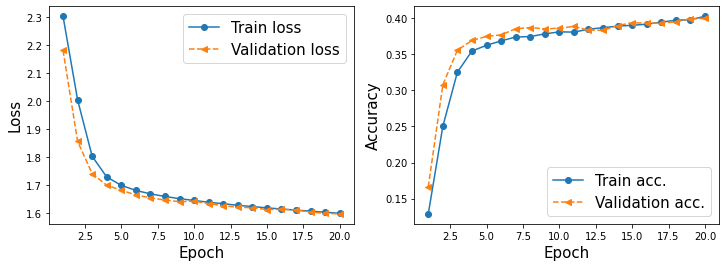

In [9]:
x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [10]:
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 0.4050


# Using Different Parameter

In [11]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5,stride=1, padding=0))
model.add_module('relu1', nn.ReLU())        
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))   
model.add_module('conv2', nn.Conv2d(in_channels=4, out_channels=2, kernel_size=5,stride=1, padding=0))
model.add_module('relu2', nn.ReLU())        
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))      

x = torch.ones((4, 1, 28, 28))
model(x).shape



torch.Size([4, 2, 4, 4])

In [12]:
model.add_module('flatten', nn.Flatten()) 

x = torch.ones((4, 1, 28, 28))
model(x).shape


torch.Size([4, 32])

In [13]:
model.add_module('fc', nn.Linear(32, 10))

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred,y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0) 
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float() 
                accuracy_hist_valid[epoch] += is_correct.sum()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)
    


Epoch 1 accuracy: 0.7691 val_accuracy: 0.8858
Epoch 2 accuracy: 0.8922 val_accuracy: 0.9043
Epoch 3 accuracy: 0.9082 val_accuracy: 0.9199
Epoch 4 accuracy: 0.9191 val_accuracy: 0.9274
Epoch 5 accuracy: 0.9275 val_accuracy: 0.9322
Epoch 6 accuracy: 0.9339 val_accuracy: 0.9353
Epoch 7 accuracy: 0.9378 val_accuracy: 0.9430
Epoch 8 accuracy: 0.9416 val_accuracy: 0.9466
Epoch 9 accuracy: 0.9442 val_accuracy: 0.9466
Epoch 10 accuracy: 0.9462 val_accuracy: 0.9494
Epoch 11 accuracy: 0.9490 val_accuracy: 0.9472
Epoch 12 accuracy: 0.9488 val_accuracy: 0.9491
Epoch 13 accuracy: 0.9504 val_accuracy: 0.9498
Epoch 14 accuracy: 0.9522 val_accuracy: 0.9531
Epoch 15 accuracy: 0.9528 val_accuracy: 0.9535
Epoch 16 accuracy: 0.9538 val_accuracy: 0.9516
Epoch 17 accuracy: 0.9545 val_accuracy: 0.9542
Epoch 18 accuracy: 0.9548 val_accuracy: 0.9540
Epoch 19 accuracy: 0.9564 val_accuracy: 0.9551
Epoch 20 accuracy: 0.9565 val_accuracy: 0.9540


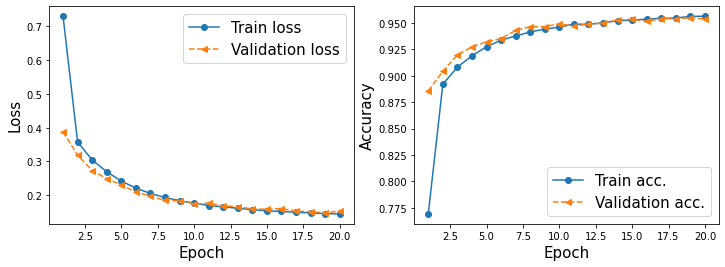

In [15]:
x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [16]:
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 0.9587
